In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os

import tensorflow as tf
from tensorflow import keras

import numpy as np

import tensorflow.keras.backend as K


In [3]:
def customLoss(yTrue,yPred):

    if yTrue.shape[0] == None:
        return 1e-7

    yPred= tf.clip_by_value(yPred, 1e-7, (1. - 1e-7))
    mask=K.less_equal(yTrue,2)

    return tf.reduce_mean(K.categorical_crossentropy(tf.one_hot(tf.cast(tf.boolean_mask(yTrue, mask),tf.int32), 3),tf.boolean_mask(yPred, mask)))


In [4]:
def create_model_all_conv():

    model = tf.keras.models.Sequential()
#convolutional layer with rectified linear unit activation
    model.add(keras.layers.Conv1D(60, kernel_size=1,padding = "Same",
                 activation=tf.keras.activations.relu,
                 input_shape=(None,26)))
#32 convolution filters used each of size 5
#again
    model.add(keras.layers.Conv1D(65, kernel_size=5, padding = "Same", activation=tf.keras.activations.relu))
    model.add(keras.layers.Conv1D(70, kernel_size=5, padding = "Same", activation=tf.keras.activations.relu))
    model.add(keras.layers.Conv1D(75, kernel_size=5, padding = "Same", activation=tf.keras.activations.relu))
    model.add(keras.layers.Conv1D(80, kernel_size=5, padding = "Same", activation=tf.keras.activations.relu))
    model.add(keras.layers.Conv1D(120, kernel_size=5, padding = "Same", activation=tf.keras.activations.relu))
    model.add(keras.layers.Conv1D(240, kernel_size=5, padding = "Same", activation=tf.keras.activations.relu))
    model.add(keras.layers.Conv1D(480, kernel_size=5, padding = "Same", activation=tf.keras.activations.relu))
    model.add(keras.layers.Conv1D(240, kernel_size=5, padding = "Same", activation=tf.keras.activations.relu))
    model.add(keras.layers.Conv1D(120, kernel_size=5, padding = "Same", activation=tf.keras.activations.relu))
    model.add(keras.layers.Conv1D(60, kernel_size=5, padding = "Same", activation=tf.keras.activations.relu))
    model.add(keras.layers.Conv1D(30, kernel_size=5,padding = "Same", activation=tf.keras.activations.relu))
    model.add(keras.layers.Conv1D(25, kernel_size=5,padding = "Same", activation=tf.keras.activations.relu))
    model.add(keras.layers.Conv1D(21, kernel_size=5,padding = "Same", activation=tf.keras.activations.relu))
    model.add(keras.layers.Conv1D(18, kernel_size=5,padding = "Same", activation=tf.keras.activations.relu))
    model.add(keras.layers.Conv1D(15, kernel_size=5,padding = "Same", activation=tf.keras.activations.relu))
    model.add(keras.layers.Conv1D(12, kernel_size=5,padding = "Same", activation=tf.keras.activations.relu))
    model.add(keras.layers.Conv1D(9, kernel_size=5,padding = "Same", activation=tf.keras.activations.relu))
    model.add(keras.layers.Conv1D(6, kernel_size=5,padding = "Same", activation=tf.keras.activations.relu))
    model.add(keras.layers.Conv1D(3, kernel_size=5,padding = "Same", activation=tf.keras.activations.softmax))

    model.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=customLoss,
                )

    return model


In [5]:
checkpoint_path_old_conv = "/nfs/amino-home/qingyliu/dihedral_angle/ML_data/whole_seq/hhblits/training_checkpoint/cp1.ckpt"

In [6]:
model_all_conv = create_model_all_conv()

In [7]:
model_all_conv.load_weights(checkpoint_path_old_conv)

In [8]:
import numpy as np

x_test = np.load("/nfs/amino-home/qingyliu/dihedral_angle/ML_data/whole_seq/hhblits/test_feature_removed.npy",allow_pickle=True)
y_test = np.load("/nfs/amino-home/qingyliu/dihedral_angle/ML_data/whole_seq/hhblits/test_label_removed.npy",allow_pickle=True)

In [9]:
correct = []
wrong = []
for j in range(300):
    correct_1 = 0
    wrong_1 = 0
    result = model_all_conv.predict(np.expand_dims(x_test[j],0))
    for i in range(y_test[j].shape[0]):
        if y_test[j][i] > 2:
            continue
        pred_label = np.argmax(result[0,i,:])
        if pred_label == y_test[j][i]:
            correct_1 += 1
        else:
            wrong_1 += 1
    correct.append(correct_1)
    wrong.append(wrong_1)
        

In [11]:
sum(correct)/(sum(correct)+sum(wrong))

0.6305366412728376

In [24]:
correct[0]

201

In [25]:
wrong[0]

107

In [26]:
201/(201+107)

0.6525974025974026

In [27]:
correct[0]/(correct[0]+wrong[0])

0.6525974025974026

In [31]:
acc_list = []
for k in range(300):
    acc_list.append(correct[k]/(correct[k]+wrong[k]))

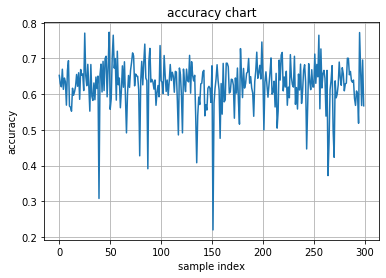

In [32]:
import matplotlib
import matplotlib.pyplot as plt
t = range(300)
fig, ax = plt.subplots()
ax.plot(t, acc_list)

ax.set(xlabel="sample index", ylabel='accuracy',
       title='accuracy chart')
ax.grid()

plt.show()

In [33]:
fig.savefig("/home/qingyliu/Downloads/FCN_acc.png")

In [1]:
correct

NameError: name 'correct' is not defined

In [37]:
wrong

84390

0.627413928599811

In [34]:
x_test[0].shape

(394, 26)

In [31]:
y_test.shape[0]

6931

In [22]:
result.shape

(1, 394, 3)

In [19]:
y_test[0].shape

(394,)

In [25]:
result[0]

array([[0.17395256, 0.4074977 , 0.4185497 ],
       [0.12744905, 0.20186035, 0.6706906 ],
       [0.29189044, 0.1918985 , 0.5162111 ],
       ...,
       [0.07922433, 0.6494146 , 0.2713611 ],
       [0.14699447, 0.23076339, 0.62224215],
       [0.24017131, 0.20719518, 0.5526335 ]], dtype=float32)

In [23]:
np.argmax(result[0,0,:])

2

In [27]:
correct = 0
wrong = 0
for i in range(y_test[0].shape[0]):
    if y_test[0][i] > 2:
        continue
    pred_label = np.argmax(result[0,i,:])
    if pred_label == y_test[0][i]:
        correct += 1
    else:
        wrong += 1
        

In [28]:
correct 

201

In [29]:
wrong

107